# Angle-Based Outlier Detection

This anomaly detection method clusters the data using KNN (K-Nearest Neighbors) and computes the angles formed by the vectors connecting data points to their neighbors. We consider an outlier to have at least one angle that is signficantly different than average. This method is particularly effective for high-dimensional data and considers direction rather than distance. However, it is sensitive to the choice of K (number of neighbors) and angle threshold. We find that K=10 and angle_threshold=pi/16 work best.

In [45]:
# import necessary dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import NearestNeighbors

In [46]:
data = pd.read_csv('intc_data.csv')

In [47]:
# convert the date column to datetime format
data['Date'] = pd.to_datetime(data['Date'], utc=True).dt.to_period('M').astype(str)
print(data['Date'])

0       1985-01
1       1985-01
2       1985-01
3       1985-01
4       1985-01
         ...   
7559    2014-12
7560    2014-12
7561    2014-12
7562    2014-12
7563    2014-12
Name: Date, Length: 7564, dtype: object


C:\Users\Tejas Srivatsav\AppData\Local\Temp\ipykernel_15540\3785880456.py:2: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  data['Date'] = pd.to_datetime(data['Date'], utc=True).dt.to_period('M').astype(str)


In [48]:
# Indicators to consider
indicators = ['Volume', 'SMA_50', 'RSI', 'MACD', 'Upper_BB', 'Lower_BB']
# Normalize the features
scaler = MinMaxScaler()
data[indicators] = scaler.fit_transform(data[indicators])

In [49]:
# Perform KNN
knn = NearestNeighbors(n_neighbors=10)
knn.fit(data[indicators])

# Get distances and indices of nearest neighbors
distances, indices = knn.kneighbors(data[indicators])

In [50]:
angles = [] 

for i in range(len(indices)):
  # Get data point and its neighbors
  data_point = data[indicators].iloc[i]
  neighbors = data[indicators].iloc[indices[i, 1:]] 
  
  # Calculate angle
  angle = np.arccos(np.dot(data_point, neighbors.T) / 
                     (np.linalg.norm(data_point) * np.linalg.norm(neighbors, axis=1)))
  
  # Append angle to list
  angles.append(angle)

In [51]:
# Set a threshold for outlier detection
angle_threshold = np.pi / 16

# convert angle list to np array
angles = np.array(angles)

# Identify outliers
outliers = data[np.any(angles > angle_threshold, axis=1)]

In [52]:
print(outliers.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25 entries, 386 to 5811
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          25 non-null     object 
 1   Open          25 non-null     float64
 2   High          25 non-null     float64
 3   Low           25 non-null     float64
 4   Close         25 non-null     float64
 5   Volume        25 non-null     float64
 6   Dividends     25 non-null     float64
 7   Stock Splits  25 non-null     float64
 8   Return        25 non-null     float64
 9   SMA_50        25 non-null     float64
 10  EMA_20        25 non-null     float64
 11  WMA_30        25 non-null     float64
 12  RSI           25 non-null     float64
 13  Upper_BB      25 non-null     float64
 14  Lower_BB      25 non-null     float64
 15  MACD          25 non-null     float64
 16  Signal_Line   25 non-null     float64
dtypes: float64(16), object(1)
memory usage: 3.5+ KB
None


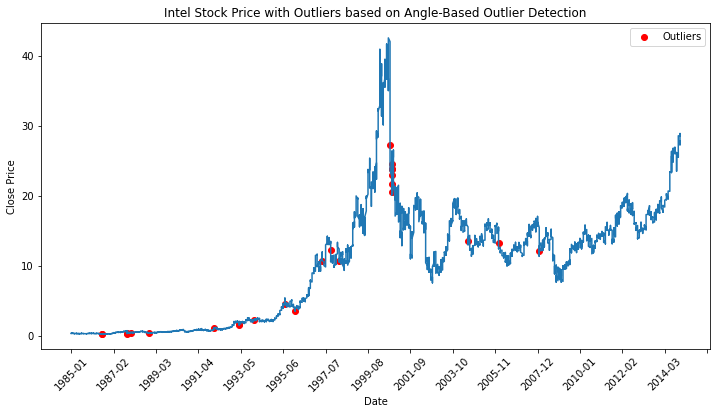

In [53]:
# Plot closing price
plt.figure(figsize=(12, 6))
plt.plot(data['Date'], data['Close'])
plt.scatter(outliers['Date'], outliers['Close'], color='red', label='Outliers')
plt.title('Intel Stock Price with Outliers based on Angle-Based Outlier Detection')
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(25))
plt.xticks(rotation=45)
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

The Angle-Based Outlier Detection method seems to primarily find periods of rapid dip in price. The outliers are spread throughout the period in consideration but there is a clear cluster during the Dot-Com Crash.